# Этап 1. Обработка данных

### Импорт библиотек и просмотр данных

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
films = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
films.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
films.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Удаляем неинформативные колонки

In [4]:
films.drop(columns=['homepage', 'overview', 'tagline', 'original_title', 'spoken_languages','id'], inplace=True)

Для удобства просмотра данных меняем местами колонки

In [5]:
films = films[['title', 'release_date', 'genres', 'keywords', 'runtime', 'status', 'budget', 
              'revenue', 'production_companies', 'production_countries', 'original_language', 
              'popularity', 'vote_count', 'vote_average']]

### Предобработка данных

В колонках genres, keywords, production_companies, production_countries не списки, а строки. Это неудобно для извлечения нужной информации и дальнейшего анализа. Преобразуем эти столбцы

In [26]:
type(films['genres'][0])

str

In [27]:
type(films['production_companies'][0])

str

In [28]:
type(films['production_countries'][0])

str

In [22]:
type(films['keywords'][0])

str

In [6]:
def clean(text):
    chars = '"\\`*_{}[]()#+-.,!":;1234567890'
    for c in chars:
        text = text.replace(c, '')
    return text

In [7]:
warnings.filterwarnings("ignore")
for i in range(len(films['genres'])):
    if films['genres'][i] == '[]':
        films['genres'][i] = None
    else:
        films['genres'][i] = clean(films['genres'][i])
        films['genres'][i] = films['genres'][i].replace('name', '')
        films['genres'][i] = films['genres'][i].replace('id', '')
        films['genres'][i] = films['genres'][i].split('    ')
        for y in range(len(films['genres'][i])):
            films['genres'][i][y] = films['genres'][i][y].lstrip()
            films['genres'][i][y] = films['genres'][i][y].rstrip()

In [8]:
warnings.filterwarnings("ignore")
for i in range(len(films['keywords'])):
    if films['keywords'][i] == '[]':
        films['keywords'][i] = None
    else:
        films['keywords'][i] = clean(films['keywords'][i])
        films['keywords'][i] = films['keywords'][i].replace('name', '')
        films['keywords'][i] = films['keywords'][i].replace('id', '')
        films['keywords'][i] = films['keywords'][i].split('    ')
        for y in range(len(films['keywords'][i])):
            films['keywords'][i][y] = films['keywords'][i][y].lstrip()
            films['keywords'][i][y] = films['keywords'][i][y].rstrip()

In [9]:
warnings.filterwarnings("ignore")
for i in range(len(films['production_companies'])):
    if films['production_companies'][i] == '[]':
        films['production_companies'][i] = None
    else:
        films['production_companies'][i] = clean(films['production_companies'][i])
        films['production_companies'][i] = films['production_companies'][i].replace('name', '')
        films['production_companies'][i] = films['production_companies'][i].replace('id', '')
        films['production_companies'][i] = films['production_companies'][i].split('    ')
        for y in range(len(films['production_companies'][i])):
            films['production_companies'][i][y] = films['production_companies'][i][y].lstrip()
            films['production_companies'][i][y] = films['production_companies'][i][y].rstrip()

In [10]:
def clean_production_countries(text):
    chars = '"\\`*_{}[]()#+-.,!":;'
    for c in chars:
        text = text.replace(c, '')
    return text

In [11]:
warnings.filterwarnings("ignore")
for i in range(len(films['production_countries'])):
    if films['production_countries'][i] == '[]':
        films['production_countries'][i] = None
    else:
        films['production_countries'][i] = clean_production_countries(films['production_countries'][i])
        films['production_countries'][i] = films['production_countries'][i].replace('name', '')
        films['production_countries'][i] = films['production_countries'][i].replace('iso31661', '')
        films['production_countries'][i] = films['production_countries'][i].split('  ')
        for y in range(len(films['production_countries'][i])):
            films['production_countries'][i][y] = films['production_countries'][i][y].lstrip()
            films['production_countries'][i][y] = films['production_countries'][i][y].rstrip()

Переведем колонку release_date в дату

In [12]:
films['release_date'] = pd.to_datetime(films['release_date']) 

In [41]:
films.head()

,title,release_date,genres,keywords,runtime,status,budget,revenue,production_companies,production_countries,original_language,popularity,vote_count,vote_average
0,Avatar,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",162.0,Released,237000000,2787965087,"[Ingenious Film Partners, Twentieth Century Fo...","[US, United States of America, GB, United King...",en,150.437577,11800,7.2
1,Pirates of the Caribbean: At World's End,2007-05-19,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",169.0,Released,300000000,961000000,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[US, United States of America]",en,139.082615,4500,6.9
2,Spectre,2015-10-26,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",148.0,Released,245000000,880674609,"[Columbia Pictures, Danjaq, B]","[GB, United Kingdom, US, United States of Amer...",en,107.376788,4466,6.3
3,The Dark Knight Rises,2012-07-16,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret e...",165.0,Released,250000000,1084939099,"[Legendary Pictures, Warner Bros, DC Entertain...","[US, United States of America]",en,112.312950,9106,7.6
4,John Carter,2012-03-07,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",132.0,Released,260000000,284139100,[Walt Disney Pictures],"[US, United States of America]",en,43.926995,2124,6.1


Оставляем только те фильмы, которые уже вышли и удаляем колонку status

In [42]:
films['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [13]:
films = films[films.status == 'Released']

In [44]:
films['status'].value_counts()

Released    4795
Name: status, dtype: int64

In [14]:
films.drop(columns=['status'], inplace=True)

Для дальнейшего анализа убираем фильмы, у которых нули в budget и revenue

In [15]:
zero_budget_revenue = films[(films['budget'] == 0) & (films['revenue'] == 0)]

In [16]:
film = films[(films['budget'] != 0) & (films['revenue'] != 0)]

Необходимо просмореть есть ли промущенные значения и если есть, то их процентное соотношение

<Axes: >

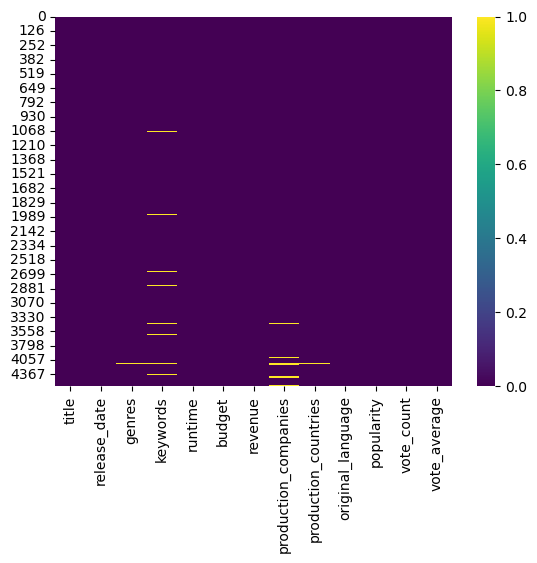

In [17]:
sns.heatmap(film.isnull(), cmap='viridis')

In [18]:
for col in film.columns:
    pct_missing = np.mean(film[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing * 100)))

title - 0%
release_date - 0%
genres - 0%
keywords - 3%
runtime - 0%
budget - 0%
revenue - 0%
production_companies - 1%
production_countries - 0%
original_language - 0%
popularity - 0%
vote_count - 0%
vote_average - 0%


Пропущенные значения находятся в столбцах с категориальными переменными, поэтому заполнить их приблизительными значениями нет возможности. Их процентное соотношение в общей массе данных незначительно, поэтому оставляем эту погрешность

Просматриваем дубликаты

In [20]:
film['title'].duplicated().sum()

1

In [21]:
film[film['title'].duplicated()]

,title,release_date,genres,keywords,runtime,budget,revenue,production_companies,production_countries,original_language,popularity,vote_count,vote_average
2877,The Host,2006-07-27,"[Horror, Drama, Science Fiction]","[river, mobile phone, bravery, archer, daughte...",119.0,11000000,88489643,"[Cineclick Asia, Happinet Pictures, Cheongeora...","[KR, South Korea]",ko,27.65527,537,6.7


In [22]:
film[film['title'] == 'The Host']

,title,release_date,genres,keywords,runtime,budget,revenue,production_companies,production_countries,original_language,popularity,vote_count,vote_average
972,The Host,2013-03-22,"[Action, Adventure, Romance, Science Fiction, ...","[based on novel, mass murder, dystopia, genoce...",125.0,44000000,63327201,"[Nick Wechsler Productions, Open Road Films, S...","[US, United States of America]",en,42.933027,1817,6.0
2877,The Host,2006-07-27,"[Horror, Drama, Science Fiction]","[river, mobile phone, bravery, archer, daughte...",119.0,11000000,88489643,"[Cineclick Asia, Happinet Pictures, Cheongeora...","[KR, South Korea]",ko,27.655270,537,6.7


В dataframe на первый взгляд был дубликат, но после проверки оказалось, что это два разных фильма. Дубликаты отсутсвуют 

# Этап 2. Разведочный анализ данных

### Вопрос 1: какова средняя оценка по всем фильмам

In [24]:
np.mean(film['vote_average'])

6.309665427509294

<Axes: xlabel='vote_average', ylabel='Count'>

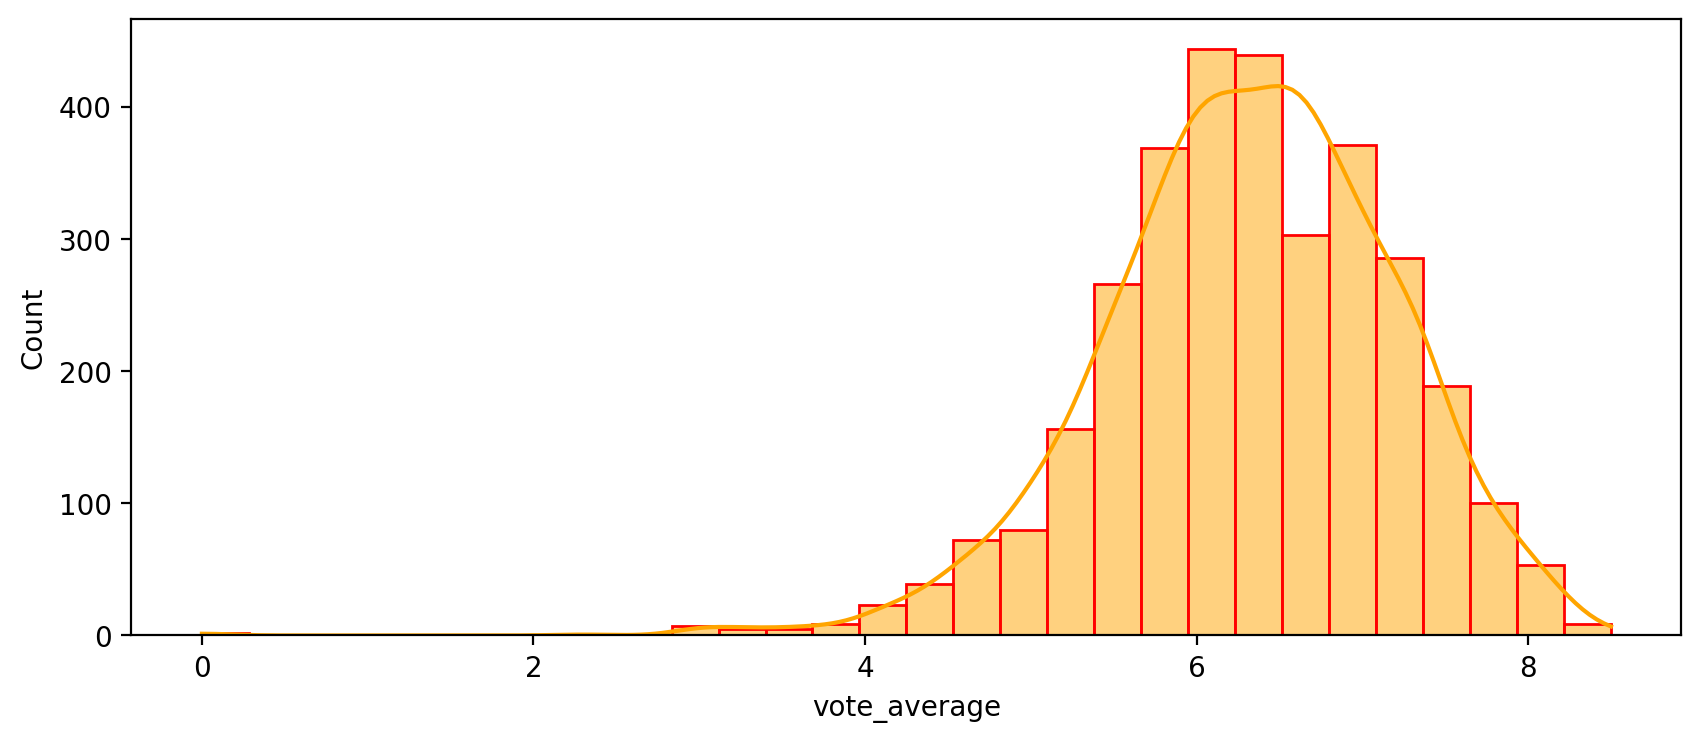

In [27]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=film,x='vote_average',bins=30,kde=True, color='orange', edgecolor='red')

Средняя оценка по всем фильмам составляет 6.3, что довольно много для более 3000 фильмов

### Вопрос 2: какие фильмы наиболее прибыльные

In [29]:
film.sort_values(by='revenue', ascending=False).head(10)

,title,release_date,genres,keywords,runtime,budget,revenue,production_companies,production_countries,original_language,popularity,vote_count,vote_average
0,Avatar,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",162.0,237000000,2787965087,"[Ingenious Film Partners, Twentieth Century Fo...","[US, United States of America, GB, United King...",en,150.437577,11800,7.2
25,Titanic,1997-11-18,"[Drama, Romance, Thriller]","[shipwreck, iceberg, ship, panic, titanic, oce...",194.0,200000000,1845034188,"[Paramount Pictures, Twentieth Century Fox Fil...","[US, United States of America]",en,100.025899,7562,7.5
16,The Avengers,2012-04-25,"[Science Fiction, Action, Adventure]","[new york, shield, marvel comic, superhero, ba...",143.0,220000000,1519557910,"[Paramount Pictures, Marvel Studios]","[US, United States of America]",en,144.448633,11776,7.4
28,Jurassic World,2015-06-09,"[Action, Adventure, Science Fiction, Thriller]","[monster, dna, tyrannosaurus rex, velociraptor...",124.0,150000000,1513528810,"[Universal Studios, Amblin Entertainment, Lege...","[US, United States of America]",en,418.708552,8662,6.5
44,Furious 7,2015-04-01,[Action],"[car race, speed, revenge, suspense, car, race...",137.0,190000000,1506249360,"[Universal Pictures, Original Film, Fuji Telev...","[JP, Japan, US, United States of America]",en,102.322217,4176,7.3
7,Avengers: Age of Ultron,2015-04-22,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero, based on com...",141.0,280000000,1405403694,"[Marvel Studios, Prime Focus, Revolution Sun S...","[US, United States of America]",en,134.279229,6767,7.3
124,Frozen,2013-11-27,"[Animation, Adventure, Family]","[queen, musical, princess, betrayal, snowman, ...",102.0,150000000,1274219009,"[Walt Disney Pictures, Walt Disney Animation S...","[US, United States of America]",en,165.125366,5295,7.3
31,Iron Man 3,2013-04-18,"[Action, Adventure, Science Fiction]","[terrorist, war on terror, tennessee, malibu, ...",130.0,200000000,1215439994,[Marvel Studios],"[CN, China, US, United States of America]",en,77.682080,8806,6.8
546,Minions,2015-06-17,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcredits...",91.0,74000000,1156730962,"[Universal Pictures, Illumination Entertainment]","[US, United States of America]",en,875.581305,4571,6.4
26,Captain America: Civil War,2016-04-27,"[Adventure, Action, Science Fiction]","[civil war, war, marvel comic, sequel, superhe...",147.0,250000000,1153304495,"[Studio Babelsberg, Marvel Studios, Walt Disne...","[US, United States of America]",en,198.372395,7241,7.1


In [30]:
top_10_revenue = film.sort_values(by='revenue', ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 films by revenue')

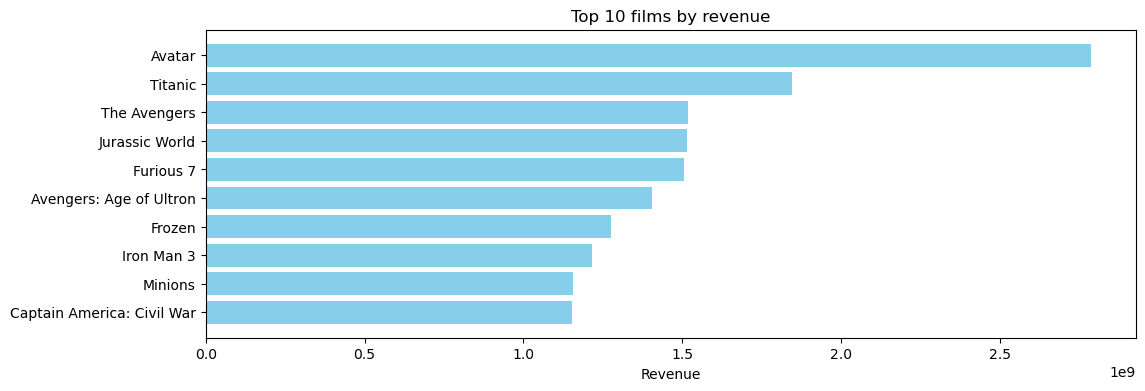

In [33]:
revenue = film.sort_values('revenue', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(revenue['title'].head(10),revenue['revenue'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Revenue")
plt.title("Top 10 films by revenue")

В топ 10 фильмов по прибыли вошли киноленты снятые в период 2010 по 2016, касающиеся темы приключений и научной фантастики. Это период активного развития графики и спецэффектов в киноиндустрии, поэтому неудивительно, что люди хотели увидеть что-то новое и зрелищное. Исключением является фильм 'Титаник', который является мировой классикой

### Вопрос 3: какие фильмы наиболее популярные

In [34]:
film.sort_values(by='popularity', ascending=False).head(10)

,title,release_date,genres,keywords,runtime,budget,revenue,production_companies,production_countries,original_language,popularity,vote_count,vote_average
546,Minions,2015-06-17,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcredits...",91.0,74000000,1156730962,"[Universal Pictures, Illumination Entertainment]","[US, United States of America]",en,875.581305,4571,6.4
95,Interstellar,2014-11-05,"[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, fa...",169.0,165000000,675120017,"[Paramount Pictures, Legendary Pictures, Warne...","[CA, Canada, US, United States of America, GB,...",en,724.247784,10867,8.1
788,Deadpool,2016-02-09,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic, superhero...",108.0,58000000,783112979,"[Twentieth Century Fox Film Corporation, Marve...","[US, United States of America]",en,514.569956,10995,7.4
94,Guardians of the Galaxy,2014-07-30,"[Action, Science Fiction, Adventure]","[marvel comic, spaceship, space, outer space, ...",121.0,170000000,773328629,"[Marvel Studios, Moving Picture Company MPC, B...","[GB, United Kingdom, US, United States of Amer...",en,481.098624,9742,7.9
127,Mad Max: Fury Road,2015-05-13,"[Action, Adventure, Science Fiction, Thriller]","[future, chase, postapocalyptic, dystopia, aus...",120.0,150000000,378858340,"[Village Roadshow Pictures, Kennedy Miller Pro...","[AU, Australia, US, United States of America]",en,434.278564,9427,7.2
28,Jurassic World,2015-06-09,"[Action, Adventure, Science Fiction, Thriller]","[monster, dna, tyrannosaurus rex, velociraptor...",124.0,150000000,1513528810,"[Universal Studios, Amblin Entertainment, Lege...","[US, United States of America]",en,418.708552,8662,6.5
199,Pirates of the Caribbean: The Curse of the Bla...,2003-07-09,"[Adventure, Fantasy, Action]","[exotic island, blacksmith, east india trading...",143.0,140000000,655011224,"[Walt Disney Pictures, Jerry Bruckheimer Films]","[US, United States of America]",en,271.972889,6985,7.5
82,Dawn of the Planet of the Apes,2014-06-26,"[Science Fiction, Action, Drama, Thriller]","[leader, colony, postapocalyptic, dystopia, fo...",130.0,170000000,710644566,"[Ingenious Media, Chernin Entertainment, TSG E...","[US, United States of America]",en,243.791743,4410,7.3
200,The Hunger Games: Mockingjay - Part 1,2014-11-18,"[Science Fiction, Adventure, Thriller]","[resistance, postapocalyptic, dystopia, war, s...",123.0,125000000,752100229,"[Lionsgate, Color Force]","[US, United States of America]",en,206.227151,5584,6.6
88,Big Hero 6,2014-10-24,"[Adventure, Family, Animation, Action, Comedy]","[brother brother relationship, hero, talent, r...",102.0,165000000,652105443,"[Walt Disney Pictures, Walt Disney Animation S...","[US, United States of America]",en,203.734590,6135,7.8


In [35]:
top_10_popularity = film.sort_values(by='popularity', ascending=False).head(10)

Text(0.5, 1.0, 'Popular Movies')

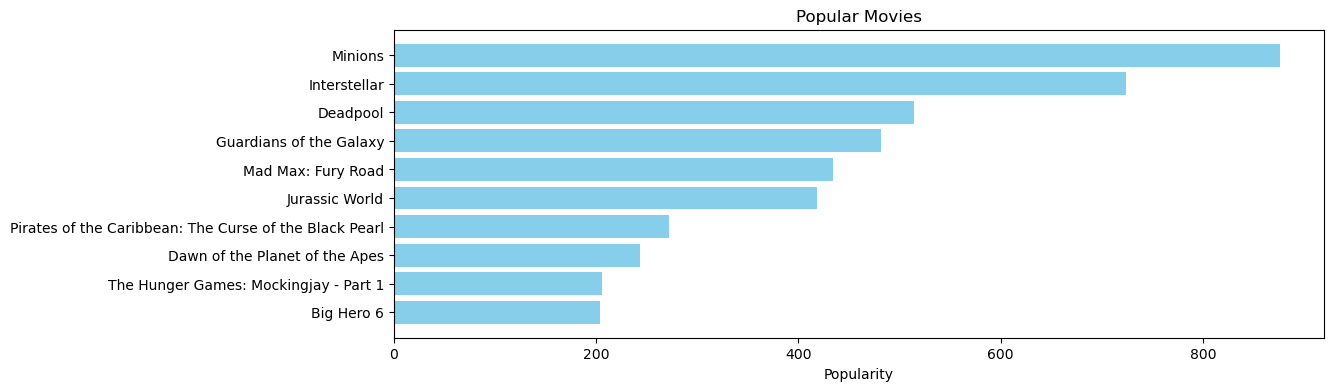

In [36]:
pop = film.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

В наиболее популярные фильмы вошло больше кинолент с семейной тематикой или для совместного просмотра. Это объяснимо, ведь просмотр фильмов является наиболее частым занятием для времяпрепровождения с семьей, а для этого выбираются более легкие фильмы по типу комедий или мультфильмов

### Вопрос 4: в каких жанрах чаще снимают фильмы

In [37]:
genres = []
for el in film['genres']:
    if el == None:
        continue
    for i in range(len(el)):
        if el[i] not in genres:
            genres.append(el[i])

In [38]:
counts = dict()
for i in film['genres']:
    if i == None:
        continue
    for el in i:
        if el not in counts:
            counts[el] = counts.get(el, 0) + 1
        else:
            counts[el] += 1

In [39]:
for el in counts:
    if counts[el] > 700:
        print(f'genre: {el} \ncounts: {counts[el]}\n')

genre: Action 
counts: 918

genre: Drama 
counts: 1440

genre: Thriller 
counts: 934

genre: Comedy 
counts: 1110



Самым популярным жанром является драма. Драматические фильмы чаще всего затрагивают реальные жизненные проблемы, что позволяет зрителю проводить параллели с собственными переживаниями и сочувствовать герояем, понимать их. Поэтому этот жанр так популярен

### Вопрос 5: кто является лидером в кинопроизводстве

In [40]:
companies = []
for el in film['production_companies']:
    if el == None:
        continue
    for i in range(len(el)):
        if el[i] not in companies:
            companies.append(el[i])

In [41]:
counts_companies = dict()
for i in film['production_companies']:
    if i == None:
        continue
    for el in i:
        if el not in counts_companies:
            counts_companies[el] = counts_companies.get(el, 0) + 1
        else:
            counts_companies[el] += 1

In [42]:
max(counts_companies.values())

280

In [43]:
for el in counts_companies:
    if counts_companies[el] > 100:
        print(f'genre: {el} \ncounts: {counts_companies[el]}\n')

genre: Twentieth Century Fox Film Corporation 
counts: 201

genre: Columbia Pictures 
counts: 167

genre: Warner Bros 
counts: 280

genre: Paramount Pictures 
counts: 245

genre: New Line Cinema 
counts: 142

genre: Universal Pictures 
counts: 273



### Вопрос 6: какова была тенденция популярности жанров по десятелетиям 

In [44]:
print(max(film['release_date']), min(film['release_date']))

2016-09-09 00:00:00 1916-09-04 00:00:00


In [48]:
films_1916_1926 = film[(film['release_date'] >= '1916-09-04') & (film['release_date'] <= '1926-12-31')]
films_1926_1936 = film[(film['release_date'] >= '1926-12-31') & (film['release_date'] <= '1936-12-31')]
films_1936_1946 = film[(film['release_date'] >= '1936-12-31') & (film['release_date'] <= '1946-12-31')]
films_1946_1956 = film[(film['release_date'] >= '1946-12-31') & (film['release_date'] <= '1956-12-31')]
films_1956_1966 = film[(film['release_date'] >= '1956-12-31') & (film['release_date'] <= '1966-12-31')]
films_1966_1976 = film[(film['release_date'] >= '1966-12-31') & (film['release_date'] <= '1976-12-31')]
films_1976_1986 = film[(film['release_date'] >= '1976-12-31') & (film['release_date'] <= '1986-12-31')]
films_1986_1996 = film[(film['release_date'] >= '1986-12-31') & (film['release_date'] <= '1996-12-31')]
films_1996_2006 = film[(film['release_date'] >= '1996-12-31') & (film['release_date'] <= '2006-12-31')]
films_2006_2016 = film[(film['release_date'] >= '2006-12-31') & (film['release_date'] <= '2016-12-31')]

In [49]:
def counts_genres(df):
    count = dict()
    for i in df:
        if i == None:
            continue
        for el in i:
            if el not in count:
                count[el] = count.get(el, 0) + 1
            else:
                count[el] += 1
    return count

In [50]:
def top_genre(dict_genres):
    top_genres = dict()
    max_value = max(dict_genres.values())
    for el in dict_genres:
        if dict_genres[el] == max_value:
            top_genres[el] = dict_genres[el]
    for el in dict_genres:
        if dict_genres[el] <= 50:
            continue
        if (max_value - 200) <= dict_genres[el] < max_value:
            top_genres[el] = dict_genres[el]
    return top_genres

In [54]:
top_1916_1926 = top_genre(counts_genres(films_1916_1926['genres']))
top_1926_1936 = top_genre(counts_genres(films_1926_1936['genres']))
top_1936_1946 = top_genre(counts_genres(films_1936_1946['genres']))
top_1946_1956 = top_genre(counts_genres(films_1946_1956['genres']))
top_1956_1966 = top_genre(counts_genres(films_1956_1966['genres']))
top_1966_1976 = top_genre(counts_genres(films_1966_1976['genres']))
top_1976_1986 = top_genre(counts_genres(films_1976_1986['genres']))
top_1986_1996 = top_genre(counts_genres(films_1986_1996['genres']))
top_1996_2006 = top_genre(counts_genres(films_1996_2006['genres']))
top_2006_2016 = top_genre(counts_genres(films_2006_2016['genres']))

In [55]:
df_16_26 = pd.DataFrame.from_dict(top_1916_1926, orient='index', columns = ['1916_1926'])
df_26_36 = pd.DataFrame.from_dict(top_1926_1936, orient='index', columns = ['1926_1936'])
df_36_46 = pd.DataFrame.from_dict(top_1936_1946, orient='index', columns = ['1936_1946'])
df_46_56 = pd.DataFrame.from_dict(top_1946_1956, orient='index', columns = ['1946_1956'])
df_56_66 = pd.DataFrame.from_dict(top_1956_1966, orient='index', columns = ['1956_1966'])
df_66_76 = pd.DataFrame.from_dict(top_1966_1976, orient='index', columns = ['1966_1976'])
df_76_86 = pd.DataFrame.from_dict(top_1976_1986, orient='index', columns = ['1976_1986'])
df_86_96 = pd.DataFrame.from_dict(top_1986_1996, orient='index', columns = ['1986_1996'])
df_96_06 = pd.DataFrame.from_dict(top_1996_2006, orient='index', columns = ['1996_2006'])
df_06_16 = pd.DataFrame.from_dict(top_2006_2016, orient='index', columns = ['2006_2016'])

In [60]:
df_16_to_36 = df_16_26.join(df_26_36, how='outer')

In [61]:
df_16_to_46 = df_36_46.join(df_16_to_36, how='outer')

In [62]:
df_16_to_56 = df_46_56.join(df_16_to_46, how='outer')

In [63]:
df_16_to_66 = df_56_66.join(df_16_to_56, how='outer')

In [64]:
df_16_to_76 = df_66_76.join(df_16_to_66, how='outer')

In [65]:
df_16_to_86 = df_76_86.join(df_16_to_76, how='outer')

In [66]:
df_16_to_96 = df_86_96.join(df_16_to_86, how='outer')

In [67]:
df_16_to_06 = df_96_06.join(df_16_to_96, how='outer')

In [68]:
df_top_genre = df_06_16.join(df_16_to_06, how='outer')

In [69]:
df_top_genre

,2006_2016,1996_2006,1986_1996,1976_1986,1966_1976,1956_1966,1946_1956,1936_1946,1916_1926,1926_1936
Action,NaN,NaN,119,60.0,NaN,NaN,NaN,NaN,NaN,NaN
Adventure,NaN,NaN,77,56.0,NaN,NaN,NaN,NaN,NaN,NaN
Comedy,469.0,456.0,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,596.0,551.0,144,51.0,31.0,30.0,15.0,14.0,2.0,6.0
Romance,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thriller,NaN,357.0,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_top_genre = df_top_genre.fillna(0)

In [71]:
df_top_genre.reset_index(inplace=True)

In [72]:
df_top_genre = df_top_genre.rename(columns={'index':'genre'})

In [98]:
df_top_genre

,genre,2006_2016,1996_2006,1986_1996,1976_1986,1966_1976,1956_1966,1946_1956,1936_1946,1916_1926,1926_1936
0,Action,0.0,0.0,119,60.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adventure,0.0,0.0,77,56.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Comedy,469.0,456.0,108,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Crime,0.0,0.0,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Drama,596.0,551.0,144,51.0,31.0,30.0,15.0,14.0,2.0,6.0
5,Romance,0.0,0.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Thriller,0.0,357.0,122,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 3000x1500 with 0 Axes>

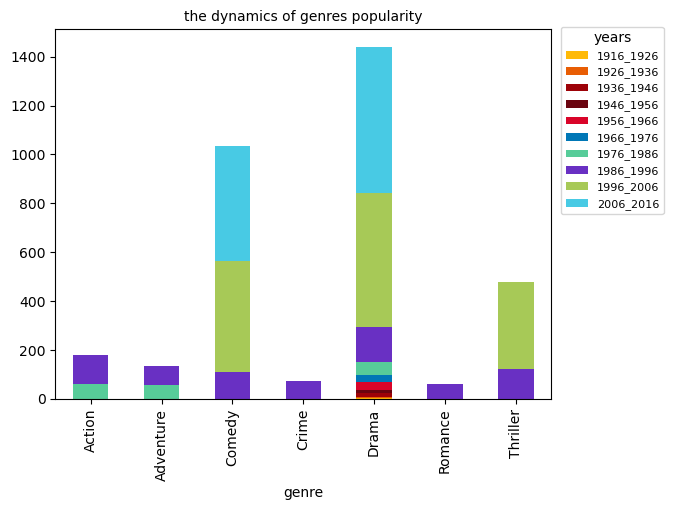

In [145]:
plt.figure(figsize=(10,5), dpi=300)
colors = ['#ffba08', '#e85d04', '#9d0208', '#6a040f', '#d90429', '#0077b6', '#57cc99', '#6930c3', '#a7c957', '#48cae4']

df_top_genre.plot(x = 'genre', y = ['1916_1926', '1926_1936', '1936_1946', '1946_1956', '1956_1966',
                                    '1966_1976', '1976_1986', '1986_1996', '1996_2006', '2006_2016'], 
                  kind='bar', stacked = True, color=colors)

plt.title('the dynamics of genres popularity', fontsize=10)
plt.legend(title='years', loc=[1.02,0.5], fontsize=8)

При просмотре графика видно популярность драмы во все периоды, этот наблюдение было обасновано в предыдущем пункте. Начиная с конца 80ых, количество фильмов в жанре комедии начинает увеличиватся. Можно предположить, что это было связано с неопределенностью начала 2000ых годов, со страхом неизвестности нового тысячитетия и в целом со сложностями этого периода во всем мире. Комедийные фильмы выпускались как бы в противовес суровой действительности

Начиная с 70ых появляются фильмы в жанре экшена и приключений. Возможно, одной из причин популярности боевиков 80х стало то, что с конца 70ых годов американское кино окончательно начало трансформироваться в индустрию развлечений, так как драматические сценарии, трагические финалы начили приедаться зрителю и требовалось что-то новое

# Заключение

За время исследования были проведены предобработка данных, разведочный анализ. В ходе разведовачного анализа данных были получены ответы на следующие вопросы:
1. Какова средняя оценка по всем фильмам
2. Какие фильмы наиболее популярны
3. Какие фильмы наиболее прибыльны
4. В каких жанрах чаще снимают 
5. Кто является лидером в кинопроизводстве
6. Какова была тенденция популярности жанров по десятелетиям